## 필요 라이브러리

In [1]:
#기본라이브러리
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import matplotlib

#표준화
from sklearn.preprocessing import StandardScaler

#분류모델
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# 최적 모델, 파라미터 탐색
import optuna

#평가지표
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
# 한글 깨짐 방지
matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc("axes", unicode_minus = False)

In [3]:
df=pd.read_csv("df_preprocessing.csv").drop(columns='Unnamed: 0')
df

,scale,spec_country,steel_kind,pt_thick,pt_width,pt_length,hsb,fur_no,fur_input_row,fur_heat_temp,...,work_group,time_category,pt_volume,pt_weight,pt_top_area,pt_surface_area,heat_T_per_min,soak_T_per_min,temp,fur_temp
0,0,미국,T,32,3700,15100,0,1호기,1열,1144,...,1조,오전,1787840.0,14070300.8,55870000,112943200,9.862069,19.203390,199.0,11
1,0,미국,T,32,3700,15100,0,1호기,2열,1144,...,1조,오전,1787840.0,14070300.8,55870000,112943200,9.377049,21.415094,198.0,9
2,0,영국,T,33,3600,19200,0,2호기,1열,1129,...,1조,오전,2280960.0,17951155.2,69120000,139744800,9.732759,20.381818,232.0,8
3,0,영국,T,33,3600,19200,0,2호기,2열,1152,...,1조,오전,2280960.0,17951155.2,69120000,139744800,9.216000,16.573529,242.0,25
4,0,프랑스,T,38,3100,13300,0,3호기,1열,1140,...,1조,오전,1566740.0,12330243.8,41230000,83706400,8.507463,23.500000,255.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,프랑스,C,19,3400,41500,0,1호기,2열,1142,...,4조,새벽,2680900.0,12090859.0,141100000,283906200,20.763636,13.383721,203.0,-9
996,0,영국,C,19,3400,41500,0,1호기,2열,1142,...,4조,새벽,2680900.0,12090859.0,141100000,283906200,20.763636,13.383721,203.0,-9
997,0,미국,C,17,3400,43700,0,2호기,2열,1169,...,4조,새벽,2525860.0,11391628.6,148580000,298761400,17.984615,15.103896,215.0,6
998,0,영국,C,17,3400,43700,0,2호기,2열,1169,...,4조,오전,2525860.0,11391628.6,148580000,298761400,17.984615,15.103896,215.0,6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   scale            1000 non-null   int64  
 1   spec_country     1000 non-null   object 
 2   steel_kind       1000 non-null   object 
 3   pt_thick         1000 non-null   int64  
 4   pt_width         1000 non-null   int64  
 5   pt_length        1000 non-null   int64  
 6   hsb              1000 non-null   int64  
 7   fur_no           1000 non-null   object 
 8   fur_input_row    1000 non-null   object 
 9   fur_heat_temp    1000 non-null   int64  
 10  fur_heat_time    1000 non-null   int64  
 11  fur_soak_temp    1000 non-null   int64  
 12  fur_soak_time    1000 non-null   int64  
 13  fur_total_time   1000 non-null   int64  
 14  rolling_method   1000 non-null   object 
 15  rolling_temp     1000 non-null   float64
 16  descaling_count  1000 non-null   int64  
 17  work_group     

In [5]:
df_y = df['scale']
df_x = df.drop(columns=['scale'])

In [6]:
for col in df.select_dtypes(include=['object']).columns.tolist():
    label_encoder = LabelEncoder()
    df_x[col]=label_encoder.fit_transform(df_x[col])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=500, stratify = df['scale'])

## 1. Decision Tree

In [8]:
dt_model = DecisionTreeClassifier(random_state=500)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
print("Confusion_matrix")
print(confusion_matrix(y_test, dt_y_pred))
print(classification_report(y_test, dt_y_pred))

Confusion_matrix
[[205   2]
 [  3  90]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       207
           1       0.98      0.97      0.97        93

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



In [9]:
df_importance = pd.DataFrame()
df_importance["Feature"] = X_test.columns
df_importance["Importance"] = dt_model.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
14,rolling_temp,0.503
5,hsb,0.173
10,fur_soak_temp,0.136
2,pt_thick,0.110
15,descaling_count,0.039
22,heat_T_per_min,0.011
12,fur_total_time,0.008
11,fur_soak_time,0.006
23,soak_T_per_min,0.005
24,temp,0.004


#### 1.1Decision Tree 파라미터 조정 (최적모델)

In [10]:
def objective(trial):
    # 하이퍼파라미터 탐색 공간 정의
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 20)

    # 랜덤 포레스트 회귀 모델 생성
    model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf= min_samples_leaf,
        random_state=500
    )
    
    # 모델 학습
    model.fit(X_train, y_train)

    # 검증 데이터에 대한 평가 지표 계산
    y_pred = model.predict(X_test)
    acc= accuracy_score(y_test, y_pred)
    return acc
# Optuna로 하이퍼파라미터 최적화 수행
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-03-12 14:39:33,471] A new study created in memory with name: no-name-0fac3a47-2dd3-429a-adf3-6ff74c1b6dac
[I 2024-03-12 14:39:33,484] Trial 0 finished with value: 0.98 and parameters: {'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 11}. Best is trial 0 with value: 0.98.
[I 2024-03-12 14:39:33,494] Trial 1 finished with value: 0.9666666666666667 and parameters: {'max_depth': 3, 'min_samples_split': 5, 'min_samples_leaf': 5}. Best is trial 0 with value: 0.98.
[I 2024-03-12 14:39:33,504] Trial 2 finished with value: 0.9833333333333333 and parameters: {'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf': 16}. Best is trial 2 with value: 0.9833333333333333.
[I 2024-03-12 14:39:33,512] Trial 3 finished with value: 0.9833333333333333 and parameters: {'max_depth': 11, 'min_samples_split': 8, 'min_samples_leaf': 16}. Best is trial 2 with value: 0.9833333333333333.
[I 2024-03-12 14:39:33,522] Trial 4 finished with value: 0.99 and parameters: {'max_depth': 12, 'min_s

[I 2024-03-12 14:39:34,516] Trial 44 finished with value: 0.9833333333333333 and parameters: {'max_depth': 6, 'min_samples_split': 14, 'min_samples_leaf': 13}. Best is trial 4 with value: 0.99.
[I 2024-03-12 14:39:34,538] Trial 45 finished with value: 0.9833333333333333 and parameters: {'max_depth': 18, 'min_samples_split': 17, 'min_samples_leaf': 8}. Best is trial 4 with value: 0.99.
[I 2024-03-12 14:39:34,580] Trial 46 finished with value: 0.9833333333333333 and parameters: {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 5}. Best is trial 4 with value: 0.99.
[I 2024-03-12 14:39:34,603] Trial 47 finished with value: 0.99 and parameters: {'max_depth': 8, 'min_samples_split': 8, 'min_samples_leaf': 3}. Best is trial 4 with value: 0.99.
[I 2024-03-12 14:39:34,627] Trial 48 finished with value: 0.9833333333333333 and parameters: {'max_depth': 17, 'min_samples_split': 15, 'min_samples_leaf': 17}. Best is trial 4 with value: 0.99.
[I 2024-03-12 14:39:34,658] Trial 49 finished

[I 2024-03-12 14:39:36,045] Trial 89 finished with value: 0.9833333333333333 and parameters: {'max_depth': 19, 'min_samples_split': 16, 'min_samples_leaf': 5}. Best is trial 4 with value: 0.99.
[I 2024-03-12 14:39:36,093] Trial 90 finished with value: 0.99 and parameters: {'max_depth': 17, 'min_samples_split': 12, 'min_samples_leaf': 2}. Best is trial 4 with value: 0.99.
[I 2024-03-12 14:39:36,118] Trial 91 finished with value: 0.99 and parameters: {'max_depth': 12, 'min_samples_split': 13, 'min_samples_leaf': 4}. Best is trial 4 with value: 0.99.
[I 2024-03-12 14:39:36,151] Trial 92 finished with value: 0.99 and parameters: {'max_depth': 11, 'min_samples_split': 12, 'min_samples_leaf': 4}. Best is trial 4 with value: 0.99.
[I 2024-03-12 14:39:36,175] Trial 93 finished with value: 0.99 and parameters: {'max_depth': 13, 'min_samples_split': 13, 'min_samples_leaf': 3}. Best is trial 4 with value: 0.99.
[I 2024-03-12 14:39:36,224] Trial 94 finished with value: 0.9833333333333333 and param

#### **Decision Tree모델 요약**
1) 파라미터 조정 결과
- max_depth = 12
- min_sample_split = 14
- min_samples_leaf = 3

2) 모델의 분류성능 (불량품 평가지표)  -> 2행 4열 표로 정리 부탁
- Accuracy : 0.99
- precision: 1.00
- recall   : 0.97
- f1_score : 0.98

3) 모델 해석  
- Test셋에 대하여, 양품은 207개 중 207개를 모두 성공적으로 분류하였고, 불량품은 93개 중 90개를 성공적으로 분류하였다.

In [10]:
dt_model = DecisionTreeClassifier(max_depth= 12, min_samples_split= 14,
                                  min_samples_leaf= 3, random_state=500)
dt_model.fit(X_train, y_train)
dt_y_pred = dt_model.predict(X_test)
print("Confusion_matrix")
print(confusion_matrix(y_test, dt_y_pred))
print()
print(classification_report(y_test, dt_y_pred))

Confusion_matrix
[[207   0]
 [  3  90]]

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       207
           1       1.00      0.97      0.98        93

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.99       300
weighted avg       0.99      0.99      0.99       300



In [11]:
df_importance = pd.DataFrame()
df_importance["Feature"] = X_test.columns
df_importance["Importance"] = dt_model.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
14,rolling_temp,0.519
5,hsb,0.178
10,fur_soak_temp,0.140
2,pt_thick,0.114
15,descaling_count,0.034
12,fur_total_time,0.008
3,pt_width,0.002
19,pt_weight,0.002
25,fur_temp,0.002
17,time_category,0.000


Text(0, 0.5, '변수')

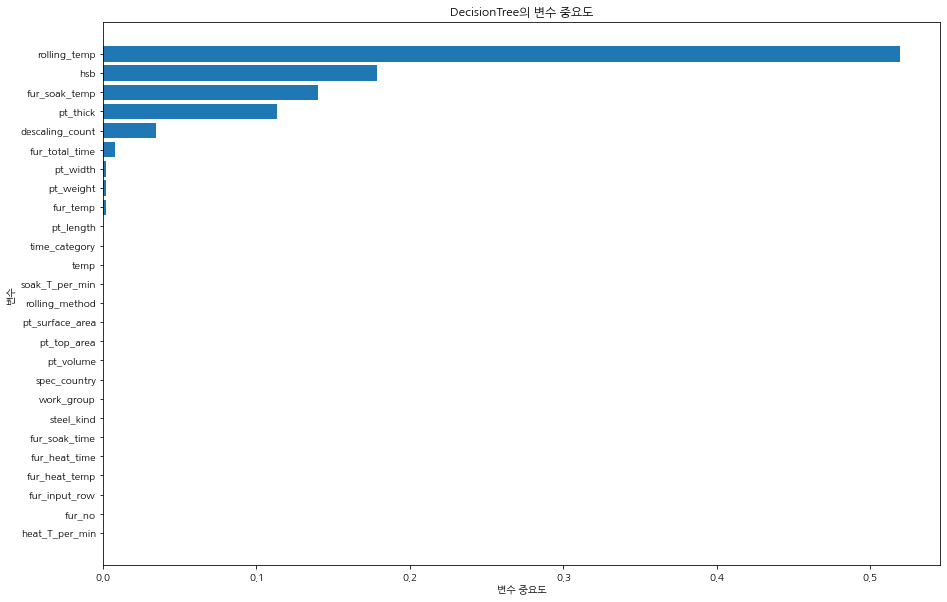

In [12]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.figure(figsize=(15,10))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.title('DecisionTree의 변수 중요도')
plt.xlabel("변수 중요도")
plt.ylabel("변수")

### 1.2 변수 중요도 확인

In [13]:
# X_train.drop(columns = ['rolling_temp', 'temp'], inplace =True)
# X_test.drop(columns = ['rolling_temp', 'temp'], inplace =True)

In [14]:
# dt_model = DecisionTreeClassifier(max_depth= 12, min_samples_split= 14,
#                                   min_samples_leaf= 3, random_state=500)
# dt_model.fit(X_train, y_train)
# dt_y_pred = dt_model.predict(X_test)
# print("Confusion_matrix")
# print(confusion_matrix(y_test, dt_y_pred))
# print()
# print(classification_report(y_test, dt_y_pred))

In [15]:
# df_importance = pd.DataFrame()
# df_importance["Feature"] = X_test.columns
# df_importance["Importance"] = dt_model.feature_importances_

# # df_feature_importance의 테이블을 중요도별로 정렬
# df_importance.sort_values("Importance", ascending=False, inplace = True)
# df_importance.round(3)

## 2. XGB

In [16]:
# XGBoost 분류 모델 설정
xgb_model = xgb.XGBClassifier(random_state=500)
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
print("Confusion_matrix")
print(confusion_matrix(y_test, xgb_y_pred))
print(classification_report(y_test, xgb_y_pred))

Confusion_matrix
[[207   0]
 [  3  90]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       207
           1       1.00      0.97      0.98        93

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.99       300
weighted avg       0.99      0.99      0.99       300



In [17]:
df_importance = pd.DataFrame()
df_importance["Feature"] = X_test.columns
df_importance["Importance"] = xgb_model.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
5,hsb,0.348
14,rolling_temp,0.294
10,fur_soak_temp,0.140
2,pt_thick,0.077
20,pt_top_area,0.025
15,descaling_count,0.024
11,fur_soak_time,0.019
6,fur_no,0.013
4,pt_length,0.008
12,fur_total_time,0.007


#### 2.1 XGB 파라미터 조정 (최적모델)

In [16]:
def objective(trial):
    # 하이퍼파라미터 탐색 공간 정의
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    learning_rate = trial.suggest_float('learning_rate', 0.1, 1)
    
    model = xgb.XGBClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        random_state=500
    )
    
    # 모델 학습
    model.fit(X_train, y_train)

    # 검증 데이터에 대한 평가 지표 계산
    y_pred = model.predict(X_test)
    acc= accuracy_score(y_test, y_pred)
    return acc
# Optuna로 하이퍼파라미터 최적화 수행
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-03-12 14:40:22,393] A new study created in memory with name: no-name-7d981c62-e05b-4d32-b37f-09c27b798af7
[I 2024-03-12 14:40:22,486] Trial 0 finished with value: 0.99 and parameters: {'n_estimators': 78, 'max_depth': 16, 'learning_rate': 0.6604477239078217}. Best is trial 0 with value: 0.99.
[I 2024-03-12 14:40:22,677] Trial 1 finished with value: 0.99 and parameters: {'n_estimators': 265, 'max_depth': 15, 'learning_rate': 0.983183019948925}. Best is trial 0 with value: 0.99.
[I 2024-03-12 14:40:22,854] Trial 2 finished with value: 0.9866666666666667 and parameters: {'n_estimators': 225, 'max_depth': 4, 'learning_rate': 0.9731330633298984}. Best is trial 0 with value: 0.99.
[I 2024-03-12 14:40:22,973] Trial 3 finished with value: 0.99 and parameters: {'n_estimators': 122, 'max_depth': 5, 'learning_rate': 0.6017303333916376}. Best is trial 0 with value: 0.99.
[I 2024-03-12 14:40:23,122] Trial 4 finished with value: 0.9866666666666667 and parameters: {'n_estimators': 181, 'max_d

[I 2024-03-12 14:40:28,577] Trial 42 finished with value: 0.99 and parameters: {'n_estimators': 133, 'max_depth': 9, 'learning_rate': 0.7367295999246078}. Best is trial 0 with value: 0.99.
[I 2024-03-12 14:40:28,750] Trial 43 finished with value: 0.9833333333333333 and parameters: {'n_estimators': 188, 'max_depth': 7, 'learning_rate': 0.6805461417410834}. Best is trial 0 with value: 0.99.
[I 2024-03-12 14:40:28,873] Trial 44 finished with value: 0.99 and parameters: {'n_estimators': 117, 'max_depth': 5, 'learning_rate': 0.8388678080358707}. Best is trial 0 with value: 0.99.
[I 2024-03-12 14:40:28,961] Trial 45 finished with value: 0.99 and parameters: {'n_estimators': 65, 'max_depth': 4, 'learning_rate': 0.570419684424647}. Best is trial 0 with value: 0.99.
[I 2024-03-12 14:40:29,080] Trial 46 finished with value: 0.99 and parameters: {'n_estimators': 95, 'max_depth': 18, 'learning_rate': 0.7741542056410318}. Best is trial 0 with value: 0.99.
[I 2024-03-12 14:40:29,195] Trial 47 finish

[I 2024-03-12 14:40:34,913] Trial 85 finished with value: 0.99 and parameters: {'n_estimators': 127, 'max_depth': 15, 'learning_rate': 0.6802204750021879}. Best is trial 0 with value: 0.99.
[I 2024-03-12 14:40:35,050] Trial 86 finished with value: 0.9866666666666667 and parameters: {'n_estimators': 135, 'max_depth': 16, 'learning_rate': 0.8722054946558653}. Best is trial 0 with value: 0.99.
[I 2024-03-12 14:40:35,264] Trial 87 finished with value: 0.99 and parameters: {'n_estimators': 248, 'max_depth': 19, 'learning_rate': 0.7989516571939181}. Best is trial 0 with value: 0.99.
[I 2024-03-12 14:40:35,441] Trial 88 finished with value: 0.9866666666666667 and parameters: {'n_estimators': 177, 'max_depth': 14, 'learning_rate': 0.5594595295628674}. Best is trial 0 with value: 0.99.
[I 2024-03-12 14:40:35,540] Trial 89 finished with value: 0.99 and parameters: {'n_estimators': 67, 'max_depth': 11, 'learning_rate': 0.7275127106725268}. Best is trial 0 with value: 0.99.
[I 2024-03-12 14:40:35,

In [17]:
# 최적의 하이퍼파라미터 및 결과 출력
best_params = study.best_params
best_accuracy = study.best_value
print(f"Best Hyperparameters: {best_params}")
print(f"Best Accuracy: {best_accuracy}")

Best Hyperparameters: {'n_estimators': 78, 'max_depth': 16, 'learning_rate': 0.6604477239078217}
Best Accuracy: 0.99


#### **XGB 최종모델 요약**
1) 파라미터 조정 결과
- n_estimators= 78
- max_depth = 16
- learning_rate = 0.6604477239078217 

2) 모델의 분류성능 (불량품 평가지표)
- Accuracy : 0.99
- precision: 1.00
- recall   : 0.97
- f1_score : 0.98

3) 모델 해석  
- Test셋에 대하여, 양품은 207개 중 207개를 모두 성공적으로 분류하였고, 불량품은 93개 중 90개를 성공적으로 분류하였다.

In [18]:
# XGBoost 분류 모델 설정
xgb_model = xgb.XGBClassifier(n_estimators= 78, max_depth= 16,
                             learning_rate= 0.6604477239078217,
                              random_state=500)
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
print("Confusion_matrix")
print(confusion_matrix(y_test, xgb_y_pred))
print(classification_report(y_test, xgb_y_pred))

Confusion_matrix
[[207   0]
 [  3  90]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       207
           1       1.00      0.97      0.98        93

    accuracy                           0.99       300
   macro avg       0.99      0.98      0.99       300
weighted avg       0.99      0.99      0.99       300



In [19]:
df_importance = pd.DataFrame()
df_importance["Feature"] = X_test.columns
df_importance["Importance"] = xgb_model.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
5,hsb,0.382
14,rolling_temp,0.298
10,fur_soak_temp,0.133
2,pt_thick,0.107
20,pt_top_area,0.017
15,descaling_count,0.012
12,fur_total_time,0.007
25,fur_temp,0.007
3,pt_width,0.005
11,fur_soak_time,0.005


Text(0, 0.5, '변수')

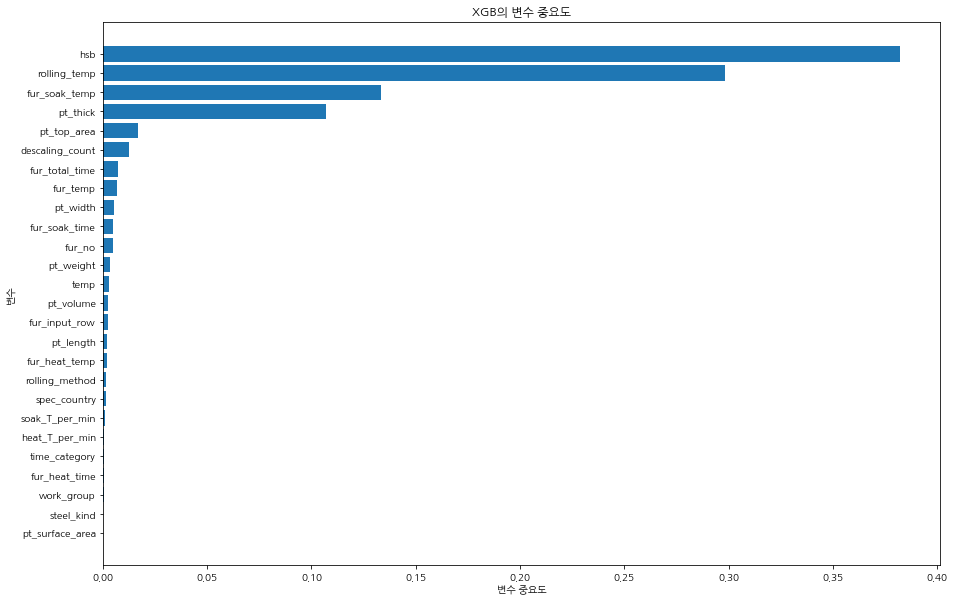

In [20]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.figure(figsize=(15,10))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.title('XGB의 변수 중요도')
plt.xlabel("변수 중요도")
plt.ylabel("변수")

### 2.2 변수 중요도 확인

In [21]:
# X_train.drop(columns = ['hsb','rolling_temp'], inplace =True)
# X_test.drop(columns = ['hsb','rolling_temp'], inplace =True)

In [22]:
# # XGBoost 분류 모델 설정
# xgb_model = xgb.XGBClassifier(n_estimators= 78, max_depth= 16,
#                              learning_rate= 0.6604477239078217,
#                               random_state=500)
# xgb_model.fit(X_train, y_train)
# xg_y_preds = xgb_model.predict(X_test)
# print("Confusion_matrix")
# print(confusion_matrix(y_test, xg_y_preds))
# print(classification_report(y_test, xg_y_preds))

In [23]:
# df_importance = pd.DataFrame()
# df_importance["Feature"] = X_test.columns
# df_importance["Importance"] = xgb_model.feature_importances_

# # df_feature_importance의 테이블을 중요도별로 정렬
# df_importance.sort_values("Importance", ascending=False, inplace = True)
# df_importance.round(3)

## 3. LGBM

In [24]:
# LGBM 분류 모델 설정l
lgb_model = lgb.LGBMClassifier(random_state=500)
lgb_model.fit(X_train, y_train)
lgb_y_pred = lgb_model.predict(X_test)
print('Confusion_matrix')
print(confusion_matrix(y_test, lgb_y_pred))
print(classification_report(y_test, lgb_y_pred))

Confusion_matrix
[[207   0]
 [  1  92]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       207
           1       1.00      0.99      0.99        93

    accuracy                           1.00       300
   macro avg       1.00      0.99      1.00       300
weighted avg       1.00      1.00      1.00       300



In [25]:
df_importance = pd.DataFrame()
df_importance["Feature"] = X_test.columns
df_importance["Importance"] = lgb_model.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
10,fur_soak_temp,334
18,pt_volume,301
15,descaling_count,284
14,rolling_temp,202
2,pt_thick,193
4,pt_length,175
24,temp,159
20,pt_top_area,103
5,hsb,100
6,fur_no,93


### 3.1 LGBM 파라미터 조정(최적 모델)

In [26]:
def objective(trial):
    # 하이퍼파라미터 탐색 공간 정의
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    learning_rate = trial.suggest_float('learning_rate', 0.1, 1)
    
    model = lgb.LGBMClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        random_state=500
    )
    
    # 모델 학습
    model.fit(X_train, y_train)

    # 검증 데이터에 대한 평가 지표 계산
    y_pred = model.predict(X_test)
    acc= accuracy_score(y_test, y_pred)
    return acc
# Optuna로 하이퍼파라미터 최적화 수행
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-03-12 14:42:13,972] A new study created in memory with name: no-name-4e6e7872-349e-491d-b62c-736e300c800c
[I 2024-03-12 14:42:14,017] Trial 0 finished with value: 0.9866666666666667 and parameters: {'n_estimators': 69, 'max_depth': 13, 'learning_rate': 0.5366108297383327}. Best is trial 0 with value: 0.9866666666666667.
[I 2024-03-12 14:42:14,072] Trial 1 finished with value: 0.9866666666666667 and parameters: {'n_estimators': 232, 'max_depth': 5, 'learning_rate': 0.39238816257448506}. Best is trial 0 with value: 0.9866666666666667.
[I 2024-03-12 14:42:14,110] Trial 2 finished with value: 0.99 and parameters: {'n_estimators': 163, 'max_depth': 16, 'learning_rate': 0.8614845012362692}. Best is trial 2 with value: 0.99.
[I 2024-03-12 14:42:14,131] Trial 3 finished with value: 0.9866666666666667 and parameters: {'n_estimators': 57, 'max_depth': 4, 'learning_rate': 0.37986583840353194}. Best is trial 2 with value: 0.99.
[I 2024-03-12 14:42:14,180] Trial 4 finished with value: 0.99 

[I 2024-03-12 14:42:17,120] Trial 38 finished with value: 0.9966666666666667 and parameters: {'n_estimators': 141, 'max_depth': 14, 'learning_rate': 0.16328996220801356}. Best is trial 5 with value: 0.9966666666666667.
[I 2024-03-12 14:42:17,193] Trial 39 finished with value: 0.9966666666666667 and parameters: {'n_estimators': 224, 'max_depth': 11, 'learning_rate': 0.4307968271829772}. Best is trial 5 with value: 0.9966666666666667.
[I 2024-03-12 14:42:17,268] Trial 40 finished with value: 0.99 and parameters: {'n_estimators': 168, 'max_depth': 6, 'learning_rate': 0.14834054054357176}. Best is trial 5 with value: 0.9966666666666667.
[I 2024-03-12 14:42:17,349] Trial 41 finished with value: 0.9966666666666667 and parameters: {'n_estimators': 126, 'max_depth': 17, 'learning_rate': 0.20805920349707838}. Best is trial 5 with value: 0.9966666666666667.
[I 2024-03-12 14:42:17,419] Trial 42 finished with value: 0.99 and parameters: {'n_estimators': 75, 'max_depth': 16, 'learning_rate': 0.2455

[I 2024-03-12 14:42:20,273] Trial 77 finished with value: 0.99 and parameters: {'n_estimators': 290, 'max_depth': 20, 'learning_rate': 0.26668823397902575}. Best is trial 5 with value: 0.9966666666666667.
[I 2024-03-12 14:42:20,375] Trial 78 finished with value: 0.9966666666666667 and parameters: {'n_estimators': 270, 'max_depth': 11, 'learning_rate': 0.12395701584308996}. Best is trial 5 with value: 0.9966666666666667.
[I 2024-03-12 14:42:20,461] Trial 79 finished with value: 0.99 and parameters: {'n_estimators': 172, 'max_depth': 9, 'learning_rate': 0.18316952155848384}. Best is trial 5 with value: 0.9966666666666667.
[I 2024-03-12 14:42:20,576] Trial 80 finished with value: 0.9966666666666667 and parameters: {'n_estimators': 296, 'max_depth': 18, 'learning_rate': 0.14893086613521184}. Best is trial 5 with value: 0.9966666666666667.
[I 2024-03-12 14:42:20,677] Trial 81 finished with value: 0.9966666666666667 and parameters: {'n_estimators': 288, 'max_depth': 10, 'learning_rate': 0.21

In [27]:
# 최적의 하이퍼파라미터 및 결과 출력
best_params = study.best_params
best_accuracy = study.best_value
print(f"Best Hyperparameters: {best_params}")
print(f"Best Accuracy: {best_accuracy}")

Best Hyperparameters: {'n_estimators': 65, 'max_depth': 9, 'learning_rate': 0.1731069475832277}
Best Accuracy: 0.9966666666666667


#### **LGBM최종모델 요약**
1) 파라미터 조정 결과
- n_estimators= 65
- max_depth = 9
- learning_rate = 0.1731069475832277 

2) 모델의 분류성능 (불량품 평가지표)
- Accuracy : 0.99
- precision: 1.00
- recall   : 0.99
- f1_score : 0.99

3) 모델 해석  
- Test셋에 대하여, 양품은 207개 중 207개를 모두 성공적으로 분류하였고, 불량품은 93개 중 92개를 성공적으로 분류하였다. 8개의 모델 중 가장 높은 불량 예측률을 보인다.

In [26]:
# LGBM 분류 모델 설정l
lgb_model = lgb.LGBMClassifier(n_estimators= 65, max_depth= 9,
                               learning_rate= 0.1731069475832277,
                               random_state=500)
lgb_model.fit(X_train, y_train)
lgb_y_pred = lgb_model.predict(X_test)
print("Confusion_matrix")
print(confusion_matrix(y_test, lgb_y_pred))
print(classification_report(y_test, lgb_y_pred))

Confusion_matrix
[[207   0]
 [  1  92]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       207
           1       1.00      0.99      0.99        93

    accuracy                           1.00       300
   macro avg       1.00      0.99      1.00       300
weighted avg       1.00      1.00      1.00       300



In [27]:
df_importance = pd.DataFrame()
df_importance["Feature"] = X_test.columns
df_importance["Importance"] = lgb_model.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
15,descaling_count,176
10,fur_soak_temp,169
14,rolling_temp,128
2,pt_thick,108
20,pt_top_area,64
4,pt_length,61
5,hsb,61
6,fur_no,49
12,fur_total_time,43
18,pt_volume,41


Text(0, 0.5, '변수')

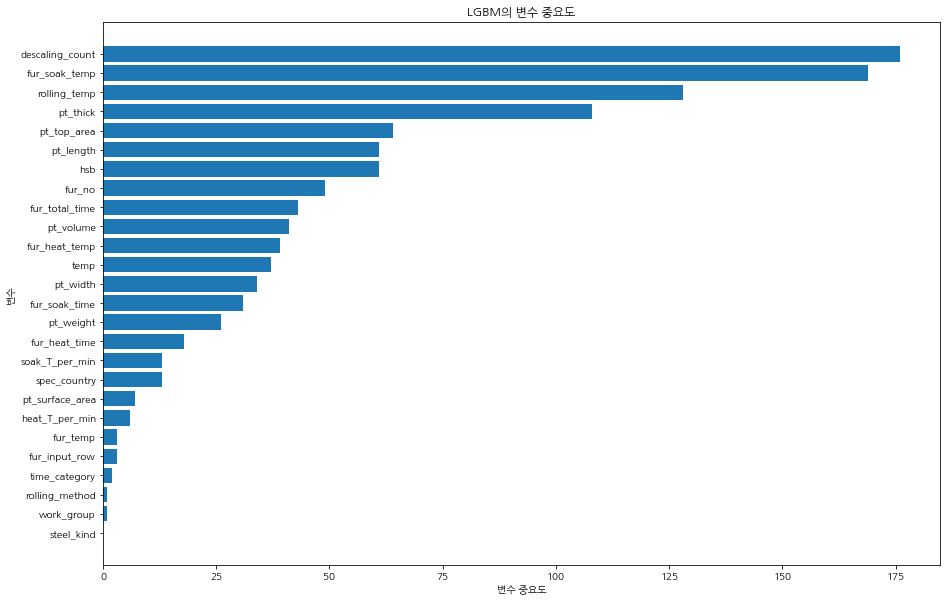

In [28]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.figure(figsize=(15,10))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.title('LGBM의 변수 중요도')
plt.xlabel("변수 중요도")
plt.ylabel("변수")

### 3.2 변수 중요도 확인

In [29]:
# X_train.drop(columns = ['descaling_count'], inplace =True)
# X_test.drop(columns = ['descaling_count'], inplace =True)

In [30]:
# # LGBM 분류 모델 설정l
# lgb_model = lgb.LGBMClassifier(n_estimators= 65, max_depth= 9,
#                                learning_rate= 0.1731069475832277,
#                                random_state=500)
# lgb_model.fit(X_train, y_train)
# lgb_y_preds = lgb_model.predict(X_test)
# print("Confusion_matrix")
# print(confusion_matrix(y_test, lgb_y_preds))
# print(classification_report(y_test, lgb_y_preds))

In [31]:
# df_importance = pd.DataFrame()
# df_importance["Feature"] = X_test.columns
# df_importance["Importance"] = lgb_model.feature_importances_

# # df_feature_importance의 테이블을 중요도별로 정렬
# df_importance.sort_values("Importance", ascending=False, inplace = True)
# df_importance.round(3)

## 4. RandomForest

In [32]:
rf_model = RandomForestClassifier(random_state=500)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
print('confusion_matrix')
print(confusion_matrix(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))

confusion_matrix
[[207   0]
 [  9  84]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       207
           1       1.00      0.90      0.95        93

    accuracy                           0.97       300
   macro avg       0.98      0.95      0.96       300
weighted avg       0.97      0.97      0.97       300



In [33]:
df_importance = pd.DataFrame()
df_importance["Feature"] = X_test.columns
df_importance["Importance"] = rf_model.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
14,rolling_temp,0.230
24,temp,0.157
5,hsb,0.116
10,fur_soak_temp,0.079
15,descaling_count,0.060
8,fur_heat_temp,0.038
3,pt_width,0.030
19,pt_weight,0.030
20,pt_top_area,0.030
2,pt_thick,0.028


### 4.1 RandomForest 파라미터 조정 (최적모델)

In [60]:
def objective(trial):
    # 하이퍼파라미터 탐색 공간 정의
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 3, 20)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 20)

    # 랜덤 포레스트 회귀 모델 생성
    model = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf= min_samples_leaf,
        random_state=500
    )
    
    # 모델 학습
    model.fit(X_train, y_train)

    # 검증 데이터에 대한 평가 지표 계산
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-03-12 16:23:42,345] A new study created in memory with name: no-name-21106ed1-57f6-496c-9c1b-130a169b12ac
[I 2024-03-12 16:23:43,000] Trial 0 finished with value: 0.9366666666666666 and parameters: {'n_estimators': 250, 'max_depth': 12, 'min_samples_split': 15, 'min_samples_leaf': 12}. Best is trial 0 with value: 0.9366666666666666.
[I 2024-03-12 16:23:43,396] Trial 1 finished with value: 0.9366666666666666 and parameters: {'n_estimators': 221, 'max_depth': 20, 'min_samples_split': 18, 'min_samples_leaf': 11}. Best is trial 0 with value: 0.9366666666666666.
[I 2024-03-12 16:23:43,544] Trial 2 finished with value: 0.9533333333333334 and parameters: {'n_estimators': 76, 'max_depth': 14, 'min_samples_split': 12, 'min_samples_leaf': 7}. Best is trial 2 with value: 0.9533333333333334.
[I 2024-03-12 16:23:43,888] Trial 3 finished with value: 0.92 and parameters: {'n_estimators': 177, 'max_depth': 7, 'min_samples_split': 2, 'min_samples_leaf': 14}. Best is trial 2 with value: 0.953333

[I 2024-03-12 16:23:56,773] Trial 36 finished with value: 0.9366666666666666 and parameters: {'n_estimators': 248, 'max_depth': 7, 'min_samples_split': 12, 'min_samples_leaf': 12}. Best is trial 13 with value: 0.9666666666666667.
[I 2024-03-12 16:23:57,524] Trial 37 finished with value: 0.97 and parameters: {'n_estimators': 300, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 37 with value: 0.97.
[I 2024-03-12 16:23:58,179] Trial 38 finished with value: 0.9533333333333334 and parameters: {'n_estimators': 298, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 7}. Best is trial 37 with value: 0.97.
[I 2024-03-12 16:23:58,526] Trial 39 finished with value: 0.9566666666666667 and parameters: {'n_estimators': 155, 'max_depth': 15, 'min_samples_split': 3, 'min_samples_leaf': 5}. Best is trial 37 with value: 0.97.
[I 2024-03-12 16:23:58,933] Trial 40 finished with value: 0.9533333333333334 and parameters: {'n_estimators': 207, 'max_depth': 12, 'min_sa

[I 2024-03-12 16:24:16,211] Trial 75 finished with value: 0.9633333333333334 and parameters: {'n_estimators': 144, 'max_depth': 12, 'min_samples_split': 15, 'min_samples_leaf': 2}. Best is trial 37 with value: 0.97.
[I 2024-03-12 16:24:16,597] Trial 76 finished with value: 0.9366666666666666 and parameters: {'n_estimators': 189, 'max_depth': 8, 'min_samples_split': 11, 'min_samples_leaf': 11}. Best is trial 37 with value: 0.97.
[I 2024-03-12 16:24:16,985] Trial 77 finished with value: 0.9566666666666667 and parameters: {'n_estimators': 202, 'max_depth': 11, 'min_samples_split': 19, 'min_samples_leaf': 4}. Best is trial 37 with value: 0.97.
[I 2024-03-12 16:24:17,438] Trial 78 finished with value: 0.9533333333333334 and parameters: {'n_estimators': 264, 'max_depth': 7, 'min_samples_split': 9, 'min_samples_leaf': 7}. Best is trial 37 with value: 0.97.
[I 2024-03-12 16:24:17,942] Trial 79 finished with value: 0.9566666666666667 and parameters: {'n_estimators': 245, 'max_depth': 9, 'min_sa

In [61]:
# 최적의 하이퍼파라미터 및 결과 출력
best_params = study.best_params
best_accuracy = study.best_value
print(f"Best Hyperparameters: {best_params}")
print(f"Best Accuracy: {best_accuracy}")

Best Hyperparameters: {'n_estimators': 300, 'max_depth': 14, 'min_samples_split': 2, 'min_samples_leaf': 2}
Best Accuracy: 0.97


#### **RandomForest최종모델 요약**
1) 파라미터 조정 결과
- n_estimators= 300
- max_depth= 14
- min_samples_split=2
- min_samples_leaf=2

2) 모델의 분류성능 (불량품 평가지표)
- Accuracy : 0.97
- precision: 1.00
- recall   : 0.90
- f1_score : 0.95

3) 모델 해석  
- Test셋에 대하여, 양품은 207개 중 207개를 모두 성공적으로 분류하였고, 불량품은 93개 중 84개를 성공적으로 분류하였다. 

In [34]:
rf_model = RandomForestClassifier(n_estimators= 300, max_depth= 14,
                                  min_samples_split=2, min_samples_leaf=2,
                                  random_state=500)
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)
print("Confusion_matrix")
print(confusion_matrix(y_test, rf_y_pred))
print(classification_report(y_test, rf_y_pred))

Confusion_matrix
[[207   0]
 [  9  84]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       207
           1       1.00      0.90      0.95        93

    accuracy                           0.97       300
   macro avg       0.98      0.95      0.96       300
weighted avg       0.97      0.97      0.97       300



In [35]:
df_importance = pd.DataFrame()
df_importance["Feature"] = X_test.columns
df_importance["Importance"] = rf_model.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
14,rolling_temp,0.253
24,temp,0.176
5,hsb,0.115
10,fur_soak_temp,0.089
15,descaling_count,0.054
8,fur_heat_temp,0.033
3,pt_width,0.029
20,pt_top_area,0.027
19,pt_weight,0.025
21,pt_surface_area,0.023


Text(0, 0.5, '변수')

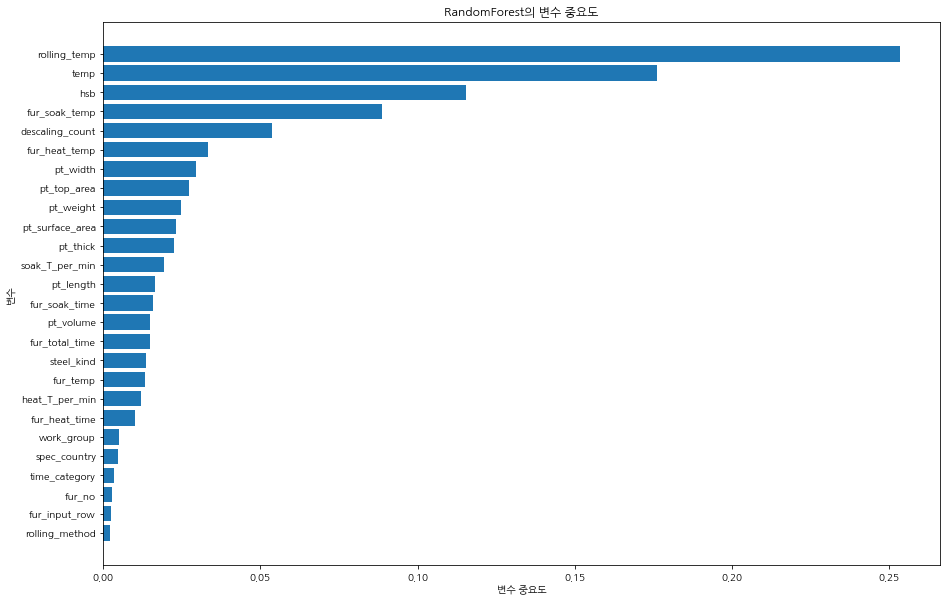

In [36]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range(len(df_importance))
plt.figure(figsize=(15,10))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.title('RandomForest의 변수 중요도')
plt.xlabel("변수 중요도")
plt.ylabel("변수")

### 4.2 변수 중요도 확인

In [37]:
# X_train.drop(columns = ['rolling_temp'], inplace =True)
# X_test.drop(columns = ['rolling_temp'], inplace =True)

In [38]:
# rf_model = RandomForestClassifier(n_estimators= 217, max_depth= 15,
#                                   min_samples_split=200, min_samples_leaf=2,
#                                   random_state=500)
# rf_model.fit(X_train, y_train)
# rf_y_pred = rf_model.predict(X_test)
# print("Confusion_matrix")
# print(confusion_matrix(y_test, dt_y_pred))
# print(classification_report(y_test, dt_y_pred))

In [39]:
# df_importance = pd.DataFrame()
# df_importance["Feature"] = X_test.columns
# df_importance["Importance"] = rf_model.feature_importances_

# # df_feature_importance의 테이블을 중요도별로 정렬
# df_importance.sort_values("Importance", ascending=False, inplace = True)
# df_importance.round(3)

## 5. logistic 회귀

#### **logistic 회귀최종모델 요약**
1) 모델의 분류성능 (불량품 평가지표)
- Accuracy : 0.97
- precision: 1.00
- recall   : 0.90
- f1_score : 0.95

2) 모델 해석  
- Test셋에 대하여, 양품은 207개 중 191개를 성공적으로 분류하였고, 불량품은 93개 중 57개를 성공적으로 분류하였다. 양품에 대한 예측 성능은 양호하나, 공정에서 중요한 불량품 예측성능이 떨어져 모델에 대한 개선이 필요하다.

In [40]:
# logistic 회귀 모델 학습
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_test)
print("Confusion_matrix")
print(confusion_matrix(y_test, lr_y_pred))
print(classification_report(y_test, lr_y_pred))

Confusion_matrix
[[191  16]
 [ 36  57]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       207
           1       0.78      0.61      0.69        93

    accuracy                           0.83       300
   macro avg       0.81      0.77      0.78       300
weighted avg       0.82      0.83      0.82       300



In [41]:
# 회귀계수와 변수명을 딕셔너리로 변환
coef_dict = {'Feature': X_train.columns, 'Coefficient': lr.coef_[0]}

# 딕셔너리를 데이터프레임으로 변환
coef_df = pd.DataFrame(coef_dict)
coef_df.sort_values('Coefficient')

,Feature,Coefficient
20,pt_top_area,-3.028692e-06
19,pt_weight,-6.509301e-07
3,pt_width,-5.089202e-09
24,temp,-2.178717e-09
11,fur_soak_time,-2.727775e-10
2,pt_thick,-9.896141e-11
22,heat_T_per_min,-1.498500e-11
16,work_group,-1.161559e-11
17,time_category,-8.810525e-12
15,descaling_count,-8.662933e-12


## 6. MLP(변수중요도X)

In [42]:
# MLP 모델 생성 및 학습
mlp_model = MLPClassifier(random_state=500)
mlp_model.fit(X_train, y_train)
mlp_y_pred = mlp_model.predict(X_test)
print("Confusion_matrix")
print(confusion_matrix(y_test, mlp_y_pred))
print(classification_report(y_test, mlp_y_pred))

Confusion_matrix
[[207   0]
 [ 93   0]]
              precision    recall  f1-score   support

           0       0.69      1.00      0.82       207
           1       0.00      0.00      0.00        93

    accuracy                           0.69       300
   macro avg       0.34      0.50      0.41       300
weighted avg       0.48      0.69      0.56       300



C:\Users\gksxk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gksxk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gksxk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
def objective(trial):
    # 하이퍼파라미터 탐색 공간 정의
    v_hidden = trial.suggest_int('v_hidden', 5, 64)
    v_function= trial.suggest_categorical('v_function', ["logistic", "tanh", "relu"])
    v_solver = trial.suggest_categorical('v_solver', ["lbfgs", "sgd", "adam"])
    v_batch = trial.suggest_int('v_batch', 20, 200)

    # 랜덤 포레스트 회귀 모델 생성
    model = MLPClassifier(
        hidden_layer_sizes = (v_hidden,v_hidden),
        activation = v_function,
        solver = v_solver,
        batch_size = v_batch,
        random_state=500
    )
    
    # 모델 학습
    model.fit(X_train, y_train)

    # 검증 데이터에 대한 평가 지표 계산
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2024-03-12 22:33:37,410] A new study created in memory with name: no-name-0b757364-fc45-400b-a73f-58bfad5d1636
[I 2024-03-12 22:33:37,492] Trial 0 finished with value: 0.7433333333333333 and parameters: {'v_hidden': 29, 'v_function': 'relu', 'v_solver': 'adam', 'v_batch': 148}. Best is trial 0 with value: 0.7433333333333333.
C:\Users\gksxk\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[I 2024-03-12 22:33:37,586] Trial 1 finished with value: 0.69 and parameters: {'v_hidden': 27, 'v_function': 'relu', 'v_solver': 'lbfgs', 'v_batch': 84}. Best is trial 0 with value: 0.7433333333333333.
[I 2024-03-12 22:33:37,972] Trial 2 finished with value: 0.69 and par

[I 2024-03-12 22:33:48,122] Trial 36 finished with value: 0.69 and parameters: {'v_hidden': 21, 'v_function': 'tanh', 'v_solver': 'adam', 'v_batch': 58}. Best is trial 32 with value: 0.7866666666666666.
C:\Users\gksxk\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
[I 2024-03-12 22:33:48,164] Trial 37 finished with value: 0.69 and parameters: {'v_hidden': 13, 'v_function': 'relu', 'v_solver': 'lbfgs', 'v_batch': 41}. Best is trial 32 with value: 0.7866666666666666.
[I 2024-03-12 22:33:48,741] Trial 38 finished with value: 0.69 and parameters: {'v_hidden': 32, 'v_function': 'tanh', 'v_solver': 'sgd', 'v_batch': 74}. Best is trial 32 with value: 0.7866666666

[I 2024-03-12 22:33:53,459] Trial 69 finished with value: 0.48 and parameters: {'v_hidden': 30, 'v_function': 'relu', 'v_solver': 'adam', 'v_batch': 162}. Best is trial 32 with value: 0.7866666666666666.
[I 2024-03-12 22:33:53,550] Trial 70 finished with value: 0.69 and parameters: {'v_hidden': 17, 'v_function': 'tanh', 'v_solver': 'adam', 'v_batch': 148}. Best is trial 32 with value: 0.7866666666666666.
[I 2024-03-12 22:33:54,072] Trial 71 finished with value: 0.31 and parameters: {'v_hidden': 60, 'v_function': 'relu', 'v_solver': 'adam', 'v_batch': 199}. Best is trial 32 with value: 0.7866666666666666.
[I 2024-03-12 22:33:54,300] Trial 72 finished with value: 0.7166666666666667 and parameters: {'v_hidden': 23, 'v_function': 'relu', 'v_solver': 'adam', 'v_batch': 35}. Best is trial 32 with value: 0.7866666666666666.
[I 2024-03-12 22:33:54,367] Trial 73 finished with value: 0.69 and parameters: {'v_hidden': 35, 'v_function': 'relu', 'v_solver': 'adam', 'v_batch': 107}. Best is trial 32

In [33]:
# 최적의 하이퍼파라미터 및 결과 출력
best_params = study.best_params
best_accuracy = study.best_value
print(f"Best Hyperparameters: {best_params}")
print(f"Best Accuracy: {best_accuracy}")

Best Hyperparameters: {'v_hidden': 16, 'v_function': 'relu', 'v_solver': 'adam', 'v_batch': 65}
Best Accuracy: 0.7833333333333333


In [44]:
# MLP 모델 생성 및 학습
mlp_model = MLPClassifier(hidden_layer_sizes=(16,16), activation="relu",
                          solver = "adam", batch_size=65,
                          random_state=500)
mlp_model.fit(X_train, y_train)
mlp_y_pred = mlp_model.predict(X_test)
print("Confusion_matrix")
print(confusion_matrix(y_test, mlp_y_pred))
print(classification_report(y_test, mlp_y_pred))

Confusion_matrix
[[197  10]
 [ 55  38]]
              precision    recall  f1-score   support

           0       0.78      0.95      0.86       207
           1       0.79      0.41      0.54        93

    accuracy                           0.78       300
   macro avg       0.79      0.68      0.70       300
weighted avg       0.78      0.78      0.76       300



## 7. KNN(비모수-변수중요도 X)

In [45]:
# 데이터 스케일링
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [46]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test_scaled)
print("Confusion_matrix")
print(confusion_matrix(y_test, knn_y_pred))
print(classification_report(y_test, knn_y_pred))

Confusion_matrix
[[207   0]
 [ 93   0]]
              precision    recall  f1-score   support

           0       0.69      1.00      0.82       207
           1       0.00      0.00      0.00        93

    accuracy                           0.69       300
   macro avg       0.34      0.50      0.41       300
weighted avg       0.48      0.69      0.56       300



C:\Users\gksxk\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\gksxk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gksxk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gksxk\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no

In [48]:
def objective(trial):
    # 하이퍼파라미터 탐색 공간 정의
    n_neighbors = trial.suggest_int('n_neighbors', 2, 15)

    # 랜덤 포레스트 회귀 모델 생성
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
        
    # 모델 학습
    model.fit(X_train_scaled, y_train)

    # 검증 데이터에 대한 평가 지표 계산
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    return acc
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

[I 2024-03-12 22:34:16,160] A new study created in memory with name: no-name-21f09197-bbcc-4ed0-b616-fda65bdda096
[I 2024-03-12 22:34:16,179] Trial 0 finished with value: 0.87 and parameters: {'n_neighbors': 14}. Best is trial 0 with value: 0.87.
[I 2024-03-12 22:34:16,195] Trial 1 finished with value: 0.87 and parameters: {'n_neighbors': 14}. Best is trial 0 with value: 0.87.
[I 2024-03-12 22:34:16,211] Trial 2 finished with value: 0.87 and parameters: {'n_neighbors': 14}. Best is trial 0 with value: 0.87.
[I 2024-03-12 22:34:16,221] Trial 3 finished with value: 0.8733333333333333 and parameters: {'n_neighbors': 2}. Best is trial 3 with value: 0.8733333333333333.
[I 2024-03-12 22:34:16,233] Trial 4 finished with value: 0.8633333333333333 and parameters: {'n_neighbors': 9}. Best is trial 3 with value: 0.8733333333333333.
[I 2024-03-12 22:34:16,247] Trial 5 finished with value: 0.8633333333333333 and parameters: {'n_neighbors': 9}. Best is trial 3 with value: 0.8733333333333333.
[I 2024

In [49]:
# 최적의 하이퍼파라미터 및 결과 출력
best_params = study.best_params
best_accuracy = study.best_value
print(f"Best Hyperparameters: {best_params}")
print(f"Best Accuracy: {best_accuracy}")

Best Hyperparameters: {'n_neighbors': 3}
Best Accuracy: 0.9033333333333333


#### **KNN모델 요약**  
1) 파라미터 조정 결과
- n_neighbors=3

2) 모델의 분류성능 (불량품 평가지표)
- Accuracy : 0.90
- precision: 0.90
- recall   : 0.77
- f1_score : 0.83

3) 모델 해석  
- Test셋에 대하여, 양품은 207개 중 199개를 성공적으로 분류하였고, 불량품은 93개 중 72개를 성공적으로 분류하였다. 

In [50]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
knn_y_pred = knn.predict(X_test_scaled)
print("Confusion_matrix")
print(confusion_matrix(y_test, knn_y_pred))
print(classification_report(y_test, knn_y_pred))

Confusion_matrix
[[199   8]
 [ 21  72]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       207
           1       0.90      0.77      0.83        93

    accuracy                           0.90       300
   macro avg       0.90      0.87      0.88       300
weighted avg       0.90      0.90      0.90       300



## 8. SVM

In [51]:
# SVM 모델 초기화 및 학습
svm_model = SVC(kernel='linear', random_state=500)  # 선형 커널 사용
svm_model.fit(X_train_scaled, y_train)

# 테스트 데이터에 대한 예측
svm_y_pred = svm_model.predict(X_test_scaled)
print(confusion_matrix(y_test, svm_y_pred))
print(classification_report(y_test, svm_y_pred))

[[195  12]
 [ 21  72]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       207
           1       0.86      0.77      0.81        93

    accuracy                           0.89       300
   macro avg       0.88      0.86      0.87       300
weighted avg       0.89      0.89      0.89       300



In [52]:
train_accuracy = []; test_accuracy = []

para_c = [10 **c for c in range(-2, 3)] # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 500)
    svm.fit(X_train_scaled, y_train)
    train_accuracy.append(svm.score(X_train_scaled, y_train))
    test_accuracy.append(svm.score(X_test_scaled, y_test))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["Cost"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy
df_accuracy_c.round(4)

,Cost,TrainAccuracy,TestAccuracy
0,0.01,0.6900,0.6900
1,0.10,0.8586,0.8567
2,1.00,0.9043,0.9100
3,10.00,0.9729,0.9267
4,100.00,1.0000,0.9033


In [53]:
train_accuracy = []; test_accuracy = []

para_c = [1 * c for c in range(1, 13)] # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인

for v_C in para_c:
    svm = SVC(C = v_C, random_state = 500)
    svm.fit(X_train_scaled, y_train)
    train_accuracy.append(svm.score(X_train_scaled, y_train))
    test_accuracy.append(svm.score(X_test_scaled, y_test))

# 데이터 테이블로 저장
df_accuracy_c = pd.DataFrame()
df_accuracy_c["Cost"] = para_c
df_accuracy_c["TrainAccuracy"] = train_accuracy
df_accuracy_c["TestAccuracy"] = test_accuracy
df_accuracy_c.round(4)

,Cost,TrainAccuracy,TestAccuracy
0,1,0.9043,0.9100
1,2,0.9314,0.9300
2,3,0.9371,0.9367
3,4,0.9429,0.9367
4,5,0.9529,0.9433
5,6,0.9586,0.9433
6,7,0.9586,0.9367
7,8,0.9614,0.9333
8,9,0.9671,0.9300
9,10,0.9729,0.9267


In [54]:
para_gamma = [10 **gamma for gamma in range(-2, 3)]   # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
train_accuracy = []; test_accuracy = []
for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 5, random_state = 500)
    svm.fit(X_train_scaled, y_train)
    train_accuracy.append(svm.score(X_train_scaled, y_train))
    test_accuracy.append(svm.score(X_test_scaled, y_test))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,0.9014,0.9100
1,0.10,0.9943,0.9200
2,1.00,1.0000,0.7200
3,10.00,1.0000,0.6967
4,100.00,1.0000,0.6933


In [55]:
para_gamma = [0.01 *gamma for gamma in range(1,11)]   # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
train_accuracy = []; test_accuracy = []
for v_gamma in para_gamma:
    svm = SVC(gamma = v_gamma, C = 5, random_state = 500)
    svm.fit(X_train_scaled, y_train)
    train_accuracy.append(svm.score(X_train_scaled, y_train))
    test_accuracy.append(svm.score(X_test_scaled, y_test))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,TestAccuracy
0,0.01,0.9014,0.9100
1,0.02,0.9243,0.9267
2,0.03,0.9386,0.9367
3,0.04,0.9586,0.9433
4,0.05,0.9671,0.9433
5,0.06,0.9757,0.9400
6,0.07,0.9857,0.9400
7,0.08,0.9929,0.9300
8,0.09,0.9943,0.9300
9,0.10,0.9943,0.9200


In [56]:
para_kernel = ['linear', 'rbf', 'poly', 'sigmoid']   # 0.01, 0.1, 1, 10, 100 : 큰 변화 영향 확인
train_accuracy = []; test_accuracy = []
for p_kernel in para_kernel:
    svm = SVC(kernel=p_kernel, gamma = 0.04, C = 5, random_state = 500)
    svm.fit(X_train_scaled, y_train)
    train_accuracy.append(svm.score(X_train_scaled, y_train))
    test_accuracy.append(svm.score(X_test_scaled, y_test))

# 데이터 테이블로 저장
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["kernel"] = para_kernel
df_accuracy_gamma["TrainAccuracy"] = train_accuracy
df_accuracy_gamma["TestAccuracy"] = test_accuracy
df_accuracy_gamma.round(4)

,kernel,TrainAccuracy,TestAccuracy
0,linear,0.8814,0.8867
1,rbf,0.9586,0.9433
2,poly,0.9543,0.9267
3,sigmoid,0.7614,0.8000


#### **SVM최종모델 요약**  
1) 파라미터 조정 결과
- C = 5
- gamma = 0.04
- kernel = 'rf'

2) 모델의 분류성능 (불량품 평가지표)
- Accuracy : 0.94
- precision: 0.95
- recall   : 0.86
- f1_score : 0.90

3) 모델 해석  
- Test셋에 대하여, 양품은 207개 중 203개를 성공적으로 분류하였고, 불량품은 93개 중 80개를 성공적으로 분류하였다. 

In [57]:
# SVM 모델 초기화 및 학습
svm_model = SVC(kernel='rbf', gamma = 0.04, C = 5, random_state = 500)  # 선형 커널 사용
svm_model.fit(X_train_scaled, y_train)
svm_y_pred = svm_model.predict(X_test_scaled)
print(confusion_matrix(y_test, svm_y_pred))
print(classification_report(y_test, svm_y_pred))

[[203   4]
 [ 13  80]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       207
           1       0.95      0.86      0.90        93

    accuracy                           0.94       300
   macro avg       0.95      0.92      0.93       300
weighted avg       0.94      0.94      0.94       300



## 변수 추가

In [58]:
models = [ "DecisionTree", "RandomForest", "XGBoosting", "LGBM", "LogisticRegression", "MLP", "KNN",  "SVM"]

acc, precision, recall=[],[],[]

# 의사결정나무예측 및 평가
dt_y_pred = dt_model.predict(X_test)
acc.append(accuracy_score(y_test, dt_y_pred))
precision.append(precision_score(y_test, dt_y_pred))
recall.append(recall_score(y_test, dt_y_pred))

# 랜덤포레스트예측 및 평가
rf_y_pred = rf_model.predict(X_test)
acc.append(accuracy_score(y_test, rf_y_pred))
precision.append(precision_score(y_test, rf_y_pred))
recall.append(recall_score(y_test, rf_y_pred))


# xgb 예측 및 평가
xgb_y_pred = xgb_model.predict(X_test)
acc.append(accuracy_score(y_test, xgb_y_pred))
precision.append(precision_score(y_test, xgb_y_pred))
recall.append(recall_score(y_test, xgb_y_pred))


# lgb 예측 및 평가
lgb_y_pred = lgb_model.predict(X_test)
acc.append(accuracy_score(y_test, lgb_y_pred))
precision.append(precision_score(y_test, lgb_y_pred))
recall.append(recall_score(y_test, lgb_y_pred))


# lr 예측 및 평가
lr_y_pred = lr.predict(X_test)
acc.append(accuracy_score(y_test, lr_y_pred))
precision.append(precision_score(y_test, lr_y_pred))
recall.append(recall_score(y_test, lr_y_pred))


# mlp 예측 및 평가
mlp_y_pred = mlp_model.predict(X_test)
acc.append(accuracy_score(y_test, mlp_y_pred))
precision.append(precision_score(y_test, mlp_y_pred))
recall.append(recall_score(y_test, mlp_y_pred))


# knn 예측 및 평가
knn_y_pred = knn.predict(X_test_scaled)
acc.append(accuracy_score(y_test, knn_y_pred))
precision.append(precision_score(y_test, knn_y_pred))
recall.append(recall_score(y_test, knn_y_pred))

# svm 예측 및 평가
svm_y_pred = svm_model.predict(X_test_scaled)
acc.append(accuracy_score(y_test, svm_y_pred))
precision.append(precision_score(y_test, svm_y_pred))
recall.append(recall_score(y_test, svm_y_pred))

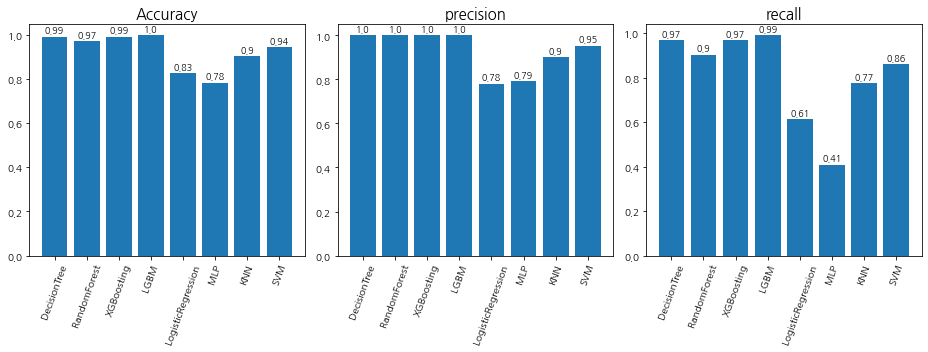

In [59]:
fig, ax = plt.subplots(1,3, figsize = (13,5))

for i, v in enumerate(acc):
    ax[0].text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom', fontsize=9)
ax[0].bar(models, acc)
ax[0].set_title("Accuracy").set_fontsize(15)
ax[0].tick_params(axis='x', rotation=70)

for i, v in enumerate(precision):
    ax[1].text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom', fontsize=9)
ax[1].bar(models, precision)
ax[1].set_title("precision").set_fontsize(15)
ax[1].tick_params(axis='x', rotation=70)

for i, v in enumerate(recall):
    ax[2].text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom', fontsize=9)
ax[2].bar(models, recall)
ax[2].set_title("recall").set_fontsize(15)
ax[2].tick_params(axis='x', rotation=70)
plt.subplots_adjust(hspace=0.5)  # 세로 간격 조정

plt.tight_layout()
plt.show()